In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

from luwiji.logistic_regression import illustration

/home/yulius/miniconda3/envs/jcopml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/yulius/miniconda3/envs/jcopml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/yulius/miniconda3/envs/jcopml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/yulius/miniconda3/envs/jcopml/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/yulius/miniconda3/envs/jcopml/lib/python3.7/importlib/_boo

# Import data

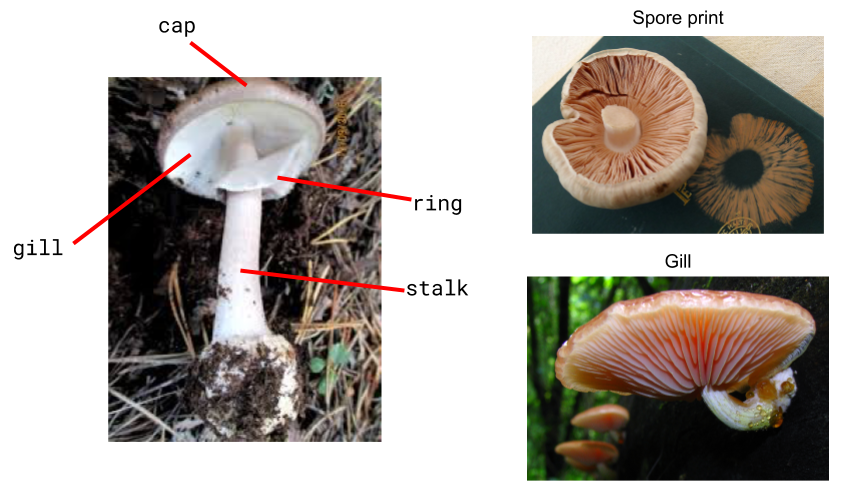

In [3]:
illustration.mushroom

In [2]:
df = pd.read_csv("/home/yulius/Latihan-Data-Science/Data/mushrooms.csv")
df.head()

,edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,False,convex,smooth,brown,True,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
1,True,convex,smooth,yellow,True,almond,free,close,broad,black,...,smooth,white,white,partial,white,1,pendant,brown,numerous,grasses
2,True,bell,smooth,white,True,anise,free,close,broad,brown,...,smooth,white,white,partial,white,1,pendant,brown,numerous,meadows
3,False,convex,scaly,white,True,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,1,pendant,black,scattered,urban
4,True,convex,smooth,gray,False,none,free,crowded,broad,black,...,smooth,white,white,partial,white,1,evanescent,brown,abundant,grasses


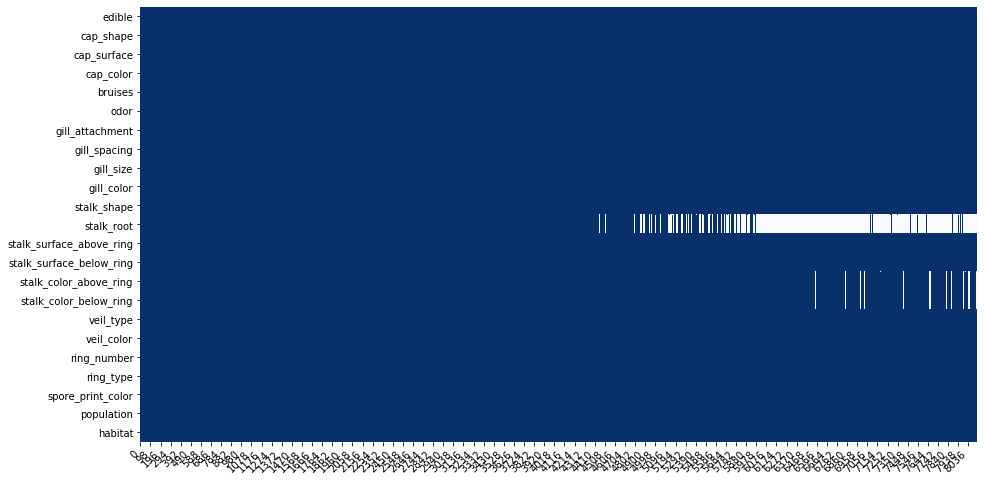

In [4]:
plot_missing_value(df)

In [5]:
df.edible.value_counts()

True     4208
False    3916
Name: edible, dtype: int64

# Association Matrix

In [6]:
from jcopml.plot import plot_association_matrix

In [7]:
df.drop(columns='veil_type',inplace=True)

In [8]:
plot_association_matrix(df, "edible", categoric_col='auto')

interactive(children=(ToggleButtons(description='method', options=("Cramer's V", 'Proficiency U(X|Y)', 'Profic…

# Dataset SPliting


In [9]:
X = df[["odor","gill_color","ring_type","spore_print_color"]]
y = df.edible

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 4), (1625, 4), (6499,), (1625,))

# Training

In [10]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from sklearn.linear_model import LogisticRegression

In [11]:
preprocessor = ColumnTransformer([
    ('categoric', cat_pipe(encoder='onehot'), X_train.columns),
])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(solver='lbfgs', n_jobs=-1, random_state=42))
])


model = GridSearchCV(pipeline, gsp.logreg_params, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


{'algo__C': 10.0, 'algo__fit_intercept': True}
0.9938452069549162 0.9938453960417766 0.9975384615384615


[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:    3.9s finished


# Evaluation

In [12]:
from jcopml.plot import plot_classification_report,plot_confusion_matrix,plot_roc_curve,plot_pr_curve

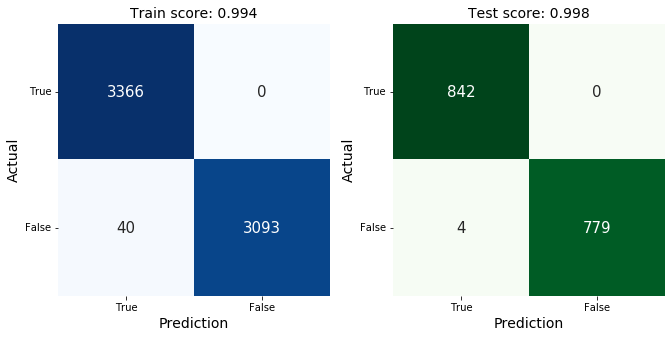

In [13]:
plot_confusion_matrix(X_train, y_train, X_test, y_test, model)

In [15]:
plot_classification_report(X_train, y_train, X_test, y_test, model, report=True)

Train report
              precision    recall  f1-score   support

       False       1.00      0.99      0.99      3133
        True       0.99      1.00      0.99      3366

    accuracy                           0.99      6499
   macro avg       0.99      0.99      0.99      6499
weighted avg       0.99      0.99      0.99      6499


Test report
              precision    recall  f1-score   support

       False       1.00      0.99      1.00       783
        True       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



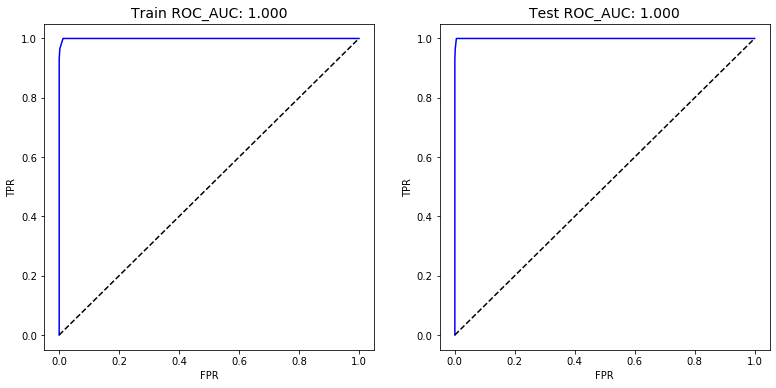

In [16]:
plot_roc_curve(X_train, y_train, X_test, y_test, model)

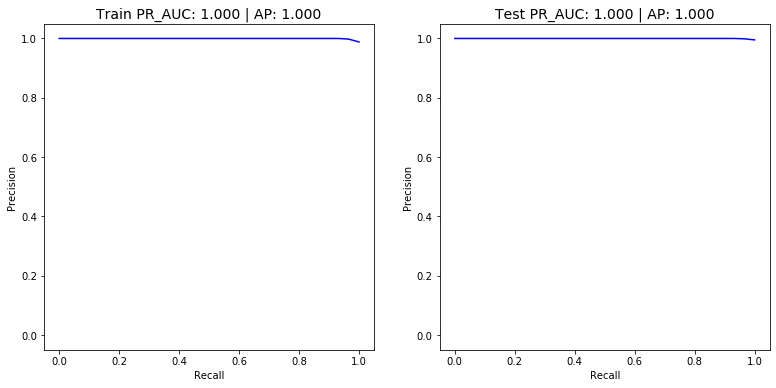

In [17]:
plot_pr_curve(X_train, y_train, X_test, y_test, model)

# Feature Importance

,feature,importance,stdev
0,odor,0.445145,0.005125
3,spore_print_color,0.013448,0.000473
1,gill_color,0.000677,0.000209
2,ring_type,0.000246,0.000123


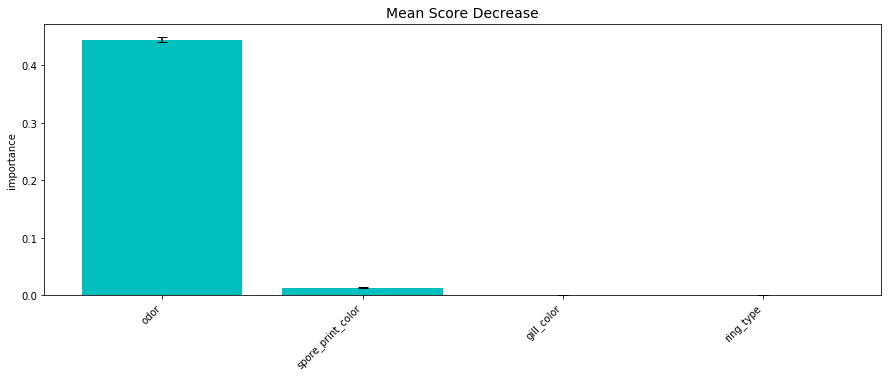

In [18]:
mean_score_decrease(X_train, y_train, model, plot=True, topk=10)

### Insight from data

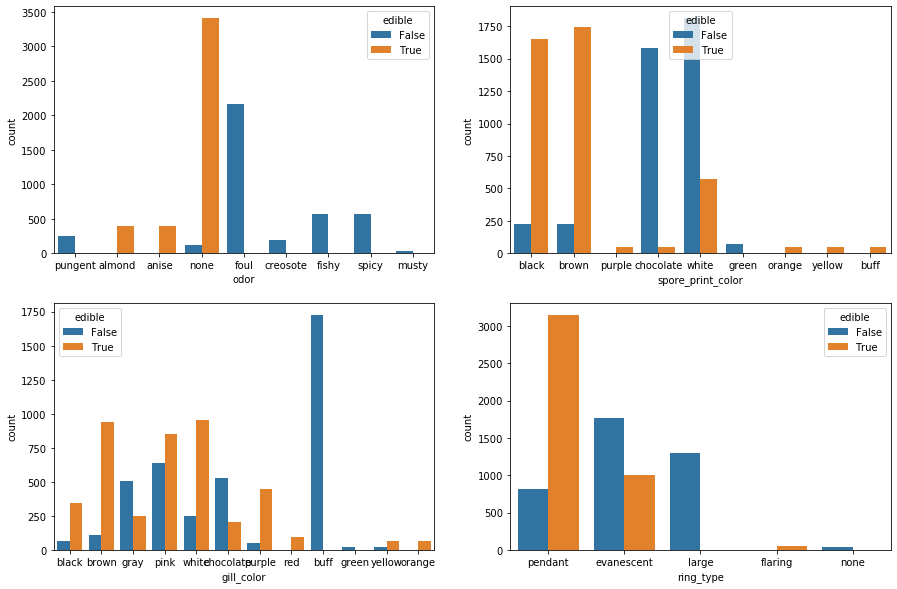

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot("odor",data=df,hue="edible")
plt.subplot(222)
sns.countplot("spore_print_color",data=df,hue="edible")
plt.subplot(223)
sns.countplot("gill_color",data=df,hue="edible")
plt.subplot(224)
sns.countplot("ring_type",data=df,hue="edible")


## Correlation Ratio

In [22]:
from jcopml.plot import plot_correlation_ratio

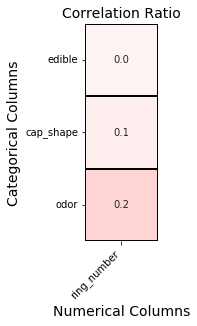

In [24]:
plot_correlation_ratio(df, ["edible","cap_shape","odor"], ["ring_number"])